In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.reset_index(inplace=True,drop=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [11]:
df.describe().round()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.0,299.0,299.0,299.0,299.0
mean,2014.0,5.0,8.0,36917.0,0.0
std,3.0,5.0,9.0,39015.0,0.0
min,2003.0,0.0,0.0,500.0,0.0
25%,2012.0,1.0,1.0,15000.0,0.0
50%,2014.0,4.0,6.0,32000.0,0.0
75%,2016.0,6.0,10.0,48884.0,0.0
max,2018.0,35.0,93.0,500000.0,3.0


In [12]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

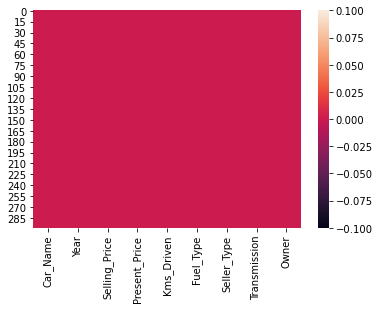

In [13]:
sns.heatmap(df.isna())

In [14]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    10
brio                        10
                            ..
Royal Enfield Bullet 350     1
Hero  CBZ Xtreme             1
Mahindra Mojo XT300          1
Honda Activa 125             1
Yamaha Fazer                 1
Name: Car_Name, Length: 98, dtype: int64

<BarContainer object of 11 artists>

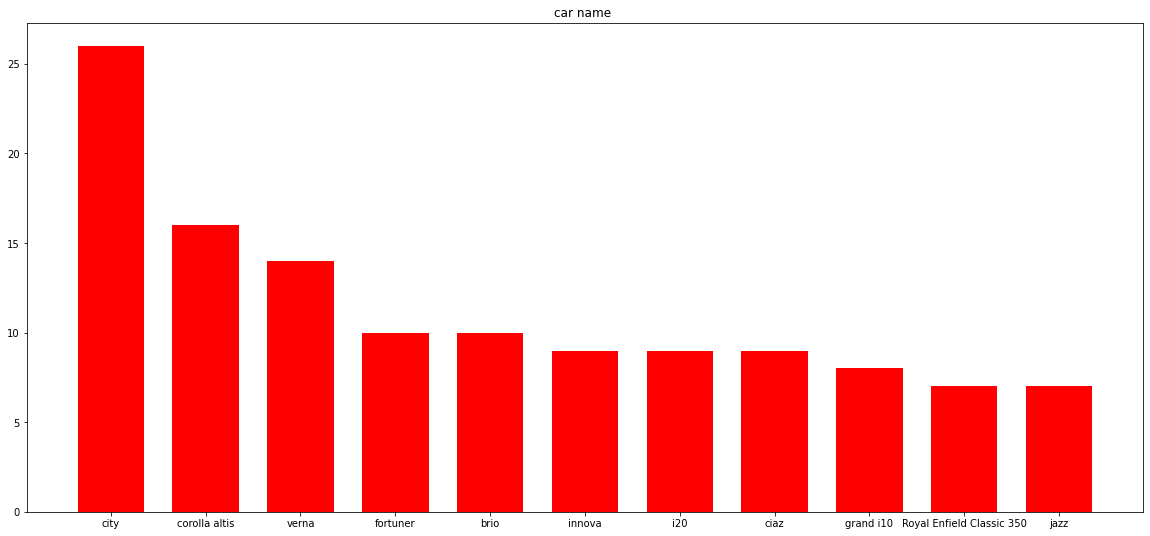

In [15]:
name=df['Car_Name'].value_counts().index[:11]
value=df['Car_Name'].value_counts().values[:11]
plt.figure(figsize=(20,9))
plt.title('car name ')
plt.bar(name,value,linewidth=0.4,color='red',width=0.7)

In [16]:
df['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
294    2016
295    2015
296    2009
297    2017
298    2016
Name: Year, Length: 299, dtype: int64

<AxesSubplot:>

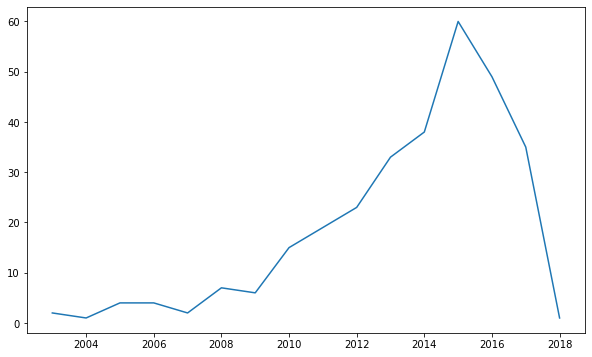

In [17]:
plt.figure(figsize=(10,6))
df['Year'].value_counts().sort_index().plot()

<BarContainer object of 11 artists>

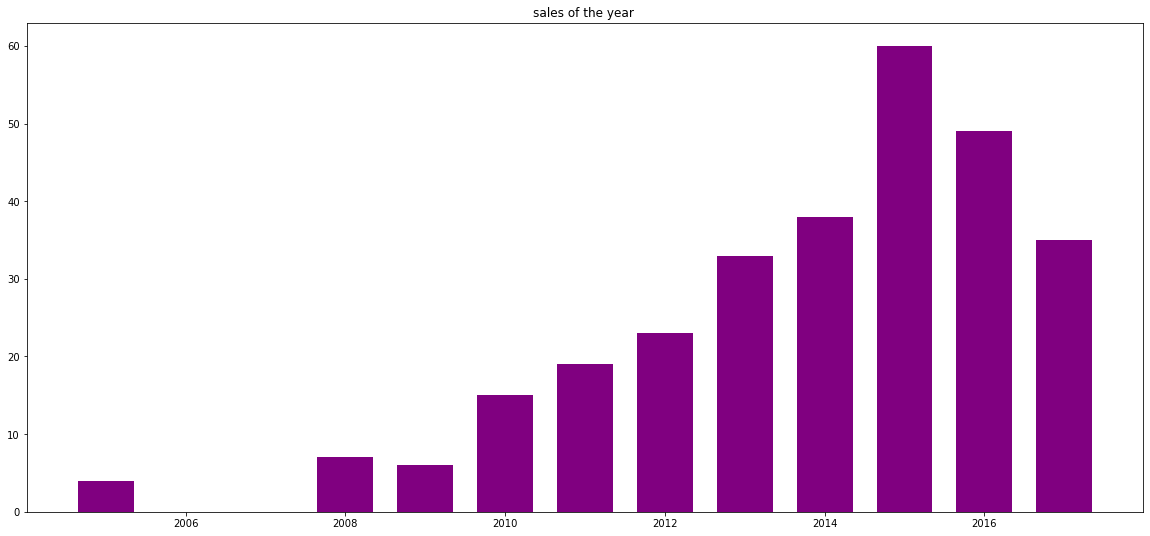

In [18]:
name=df['Year'].value_counts().index[:11]
value=df['Year'].value_counts().values[:11]
plt.figure(figsize=(20,9))
plt.title('sales of the year ')
plt.bar(name,value,width=0.7,color='purple')

In [19]:
cor=df.corr()

<AxesSubplot:>

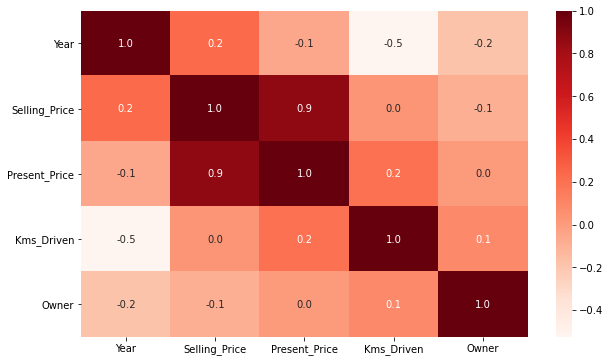

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='Reds')

In [21]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

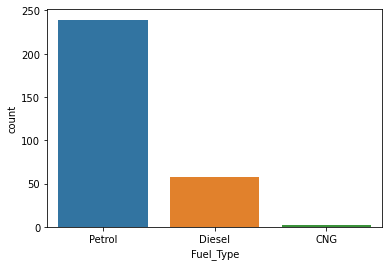

In [22]:
sns.countplot(data=df,x='Fuel_Type')

In [23]:
df['Seller_Type'].value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

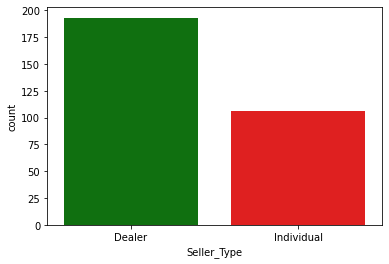

In [24]:
sns.countplot(data=df,x='Seller_Type',palette=['g','r'])

In [25]:
df['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

<AxesSubplot:ylabel='Transmission'>

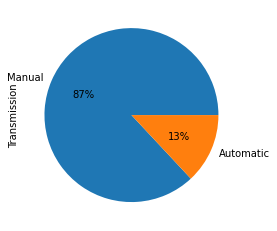

In [26]:
df['Transmission'].value_counts().plot.pie(autopct='%.0f%%')

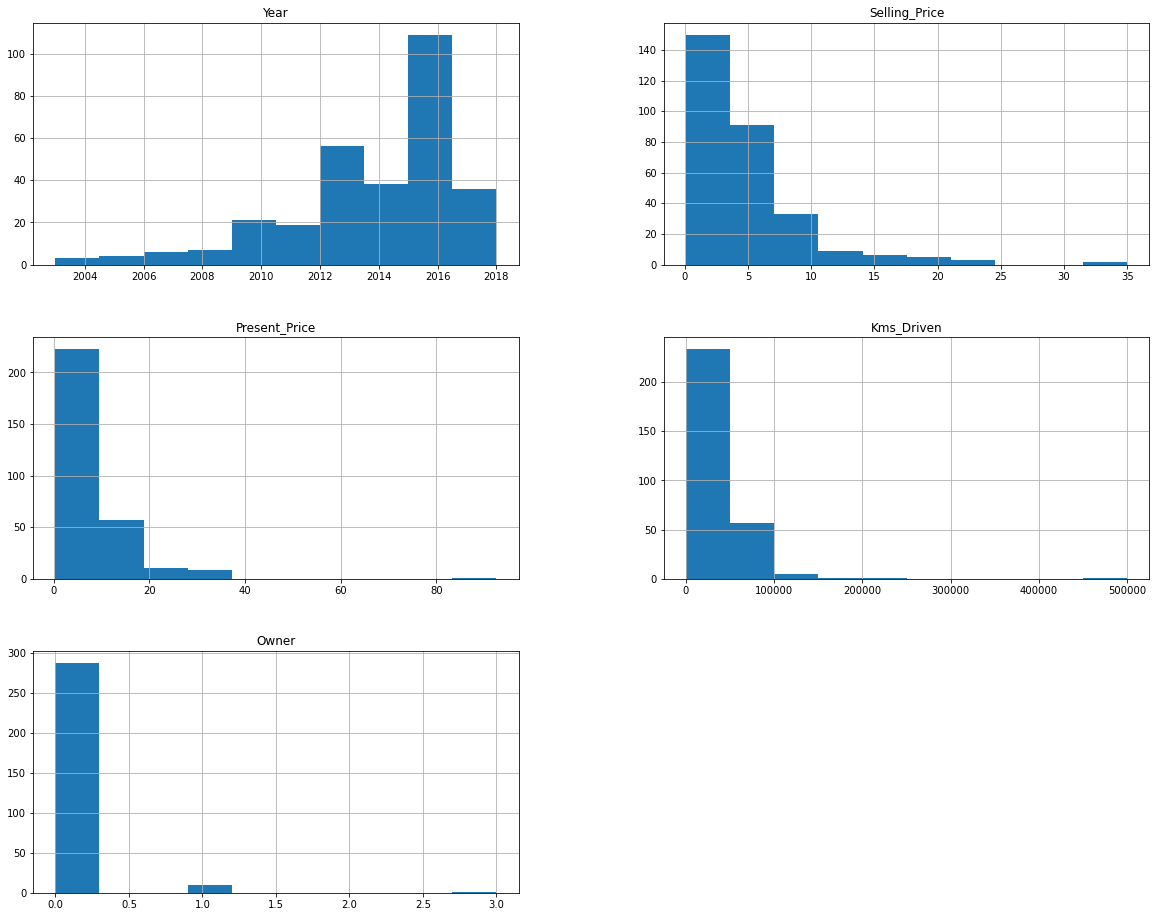

In [27]:
df.hist(figsize=(20,16))
plt.show()

In [28]:
df.drop(['Fuel_Type','Seller_Type','Transmission','Car_Name'],axis=1,inplace=True)

In [29]:
df=pd.get_dummies(df)

# Model

In [30]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [31]:
X

,Year,Present_Price,Kms_Driven,Owner
0,2014,5.59,27000,0
1,2013,9.54,43000,0
2,2017,9.85,6900,0
3,2011,4.15,5200,0
4,2014,6.87,42450,0
...,...,...,...,...
294,2016,11.60,33988,0
295,2015,5.90,60000,0
296,2009,11.00,87934,0
297,2017,12.50,9000,0


In [32]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
294     9.50
295     4.00
296     3.35
297    11.50
298     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
sc.fit_transform(X_train,y_train)

array([[ 1.11819461e+00, -6.27985773e-01, -1.13542136e+00,
        -1.90445347e-01],
       [ 8.12289745e-02, -6.31051564e-02,  1.28176835e+00,
        -1.90445347e-01],
       [ 8.12289745e-02,  1.68101246e-02,  1.73601145e-01,
        -1.90445347e-01],
       [ 4.26884185e-01, -7.24322003e-01,  1.59749055e-01,
        -1.90445347e-01],
       [-9.55736658e-01, -7.12717866e-01, -9.69196283e-01,
        -1.90445347e-01],
       [-9.55736658e-01, -2.99566810e-01, -3.97208855e-01,
        -1.90445347e-01],
       [-2.64426236e-01, -6.42217262e-01, -3.41802053e-02,
        -1.90445347e-01],
       [-1.30139187e+00,  7.04518887e-02,  2.58168155e-01,
        -1.90445347e-01],
       [ 7.72539396e-01, -7.50595520e-01,  5.54533621e-01,
        -1.90445347e-01],
       [-2.64426236e-01,  1.23414975e+00,  3.81382496e-01,
        -1.90445347e-01],
       [ 8.12289745e-02, -7.14469434e-01,  2.77491821e-01,
        -1.90445347e-01],
       [-1.30139187e+00,  2.80640025e-01,  1.38970920e-01,
      

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 4), (99, 4), (200,), (99,))

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model=LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
pre=model.predict(X_test)
pre

array([ 7.78070337,  6.56699032,  2.03156646,  5.91158365, 10.87622474,
        4.34115666,  9.58361471,  2.5244413 ,  7.63735133,  0.05735578,
        9.63019733, -0.5628035 , -0.5692779 ,  2.46559888,  4.98897679,
        5.28716356,  2.25478458,  2.66447943, 20.67840496,  1.77441216,
        1.7680973 ,  3.25533076,  5.64591554, -0.41011195,  5.04172432,
        8.27805024,  8.09094104,  2.0927343 ,  4.84610568,  5.30611983,
        3.94996463,  5.58816824,  5.04090339,  2.14419753,  3.00925053,
        5.74398825,  2.08378825, -0.93540663,  2.50109294,  9.99097018,
        8.01280085,  8.22368151,  2.39881547,  2.97884813,  1.75262922,
       -1.80985292,  8.7135943 ,  4.16646585,  3.94455291,  0.33482597,
        1.29802608,  0.75584536, 11.45282043,  8.7275533 ,  7.86275268,
        5.52484548,  3.51310404,  3.49944289,  8.90818606,  9.98454281,
        5.4785477 , -1.42902818,  0.73996293, -0.33075122,  2.12916373,
        2.69388695,  8.74189645,  8.65552767,  2.29694785,  5.18

In [56]:
y_test.values

array([ 8.99,  8.35,  0.45,  7.45,  5.25,  5.25,  5.85,  1.15,  9.25,
        0.38,  9.65,  0.16,  0.25,  0.48,  4.1 ,  4.5 ,  0.51,  1.2 ,
       33.  ,  0.6 ,  0.48,  1.35,  5.25,  1.05,  5.5 ,  9.7 ,  8.25,
        1.1 ,  4.5 ,  4.8 ,  3.25,  4.75,  5.5 ,  3.  ,  2.65,  6.5 ,
        1.11,  0.17,  1.15,  4.  ,  5.5 , 12.5 ,  1.05,  1.5 ,  0.75,
        0.12, 11.25,  4.5 ,  4.5 ,  0.3 ,  0.55,  0.25,  2.5 , 12.9 ,
        6.25,  4.9 ,  3.75,  4.15, 11.75,  6.95,  6.75,  0.25,  0.25,
        0.52,  2.35,  2.5 , 10.25,  4.75,  2.  ,  5.75,  0.8 ,  6.15,
        7.4 ,  8.5 ,  0.45,  2.55, 14.5 ,  9.25,  3.35,  0.2 ,  0.27,
        2.85,  0.4 , 14.73, 11.25,  0.65,  2.65,  7.75,  2.85,  0.45,
        5.25, 14.25,  5.11,  3.  ,  7.25,  1.05,  4.1 ,  3.  ,  4.35])

In [71]:
from sklearn.metrics import rand_score

In [72]:
rand_score(pre,y_test)

C:\Users\amr\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.9919604205318491